In [1]:
## Importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
import statistics 

import warnings
warnings.filterwarnings('ignore')

## Data Understanding:

In [2]:
# Reading the dataset
credit_card_df = pd.read_csv('creditcard.csv')
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


From above dataset we see that, all the variables are transfered into PCA and only Amount and Time column is available as raw values.

In [3]:
# Checking the shape of database
credit_card_df.shape

(284807, 31)

In [4]:
# Cheacking the info of data set
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Check for missing values
round(credit_card_df.isnull().sum()/len(credit_card_df),2)
# There are no missing values

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

## Exploratory data analytics (EDA): 

In [7]:
# Columns available in our dataset
credit_card_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Class is a dependent variable, which has 0 and 1 value. Where 0 represents legitimate transaction and 1 represent fraud transaction. Chekcing the value of these transaction

In [8]:
# Chekcing the count of 0's and 1's
print(credit_card_df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [9]:
# Checking the percentage value of the class 0 & 1 values
classes=credit_card_df['Class'].value_counts()
normal_share=classes[0]/credit_card_df['Class'].count()*100
fraud_share=classes[1]/credit_card_df['Class'].count()*100
print("Legitmate Transaction : ", normal_share)
print("Fraud Tranction : ", fraud_share)

Legitmate Transaction :  99.82725143693798
Fraud Tranction :  0.1727485630620034


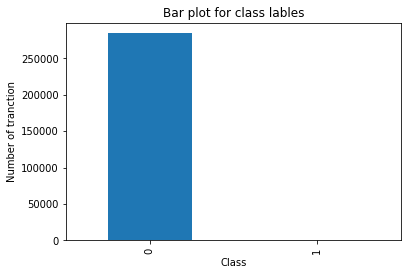

In [10]:
# Chekcing the class by the bar plot
classes.plot(kind = 'bar')
plt.title('Bar plot for class lables')
plt.xlabel('Class')
plt.ylabel('Number of tranction')
plt.show()

So from above bar plot we can see data is highly imbalance as count of fraud tranction is very low (0.17%)

Checking the dependencies of Time and Amount on Class value by scatter plot

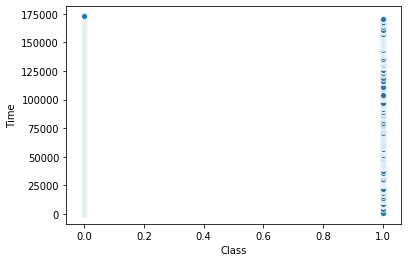

In [11]:
sns.scatterplot(y='Time', x='Class', data=credit_card_df)
plt.show()

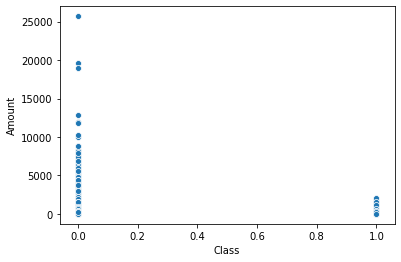

In [12]:
sns.scatterplot(y='Amount', x='Class', data=credit_card_df)
plt.show()

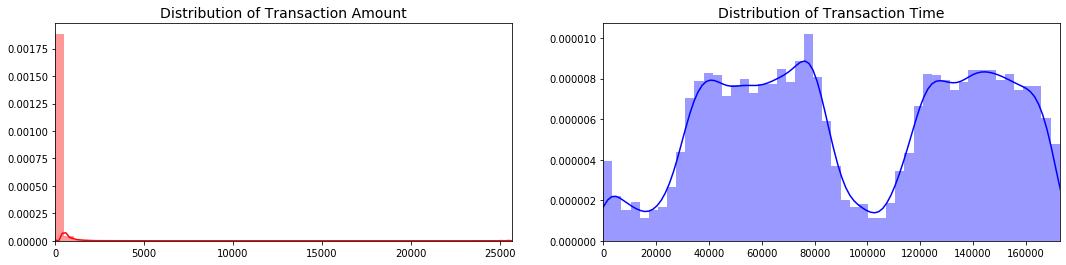

In [13]:
# Checking the distribution of Time and Amount column with respect to class labels
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = credit_card_df['Amount'].values
time_val = credit_card_df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [14]:
# As we can see from above plots that Time is not impacting much to the Class variable, Hence it is not useful for our analysis, So it can be removed.
credit_card_df = credit_card_df.drop('Time', axis = 1)

In [15]:
# Remaining columns
credit_card_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

### Scaling and Power transformaiton of variables

In [40]:
# Importing model building libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from imblearn import over_sampling
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [17]:
# Since Amount column is not transformed so we have to scale the amount, so it can be scaled to min max scalled values.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
credit_card_df['Amount']= scaler.fit_transform(credit_card_df['Amount'].values.reshape(-1,1))

In [18]:
# As 'Class' is the dependent variable, hence seprating it and creating two dataframe with dependent and independent variables.
y = credit_card_df['Class']
X = credit_card_df.drop("Class", axis = 1)

In [19]:
# Checking the head after scalling
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

Now we plot the distribution of the variables, to check the skewness in the variable, so it can be resolved

Distribution of the feature  V1


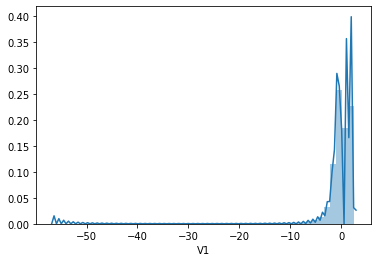

Distribution of the feature  V2


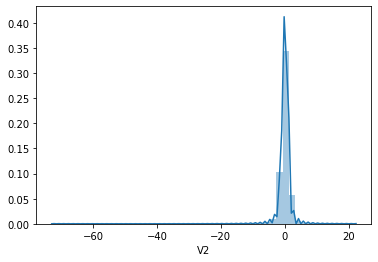

Distribution of the feature  V3


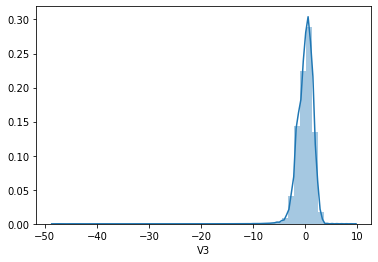

Distribution of the feature  V4


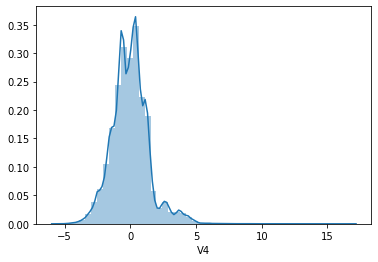

Distribution of the feature  V5


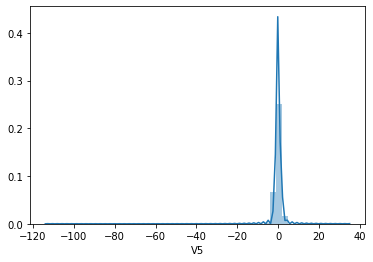

Distribution of the feature  V6


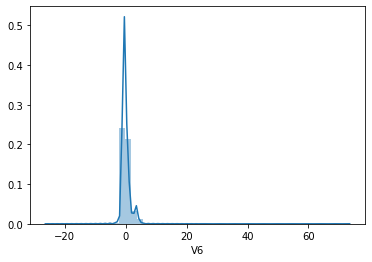

Distribution of the feature  V7


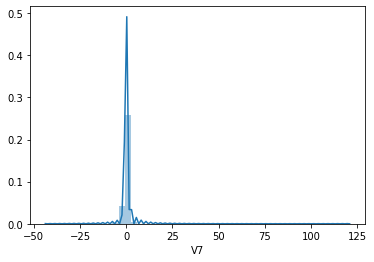

Distribution of the feature  V8


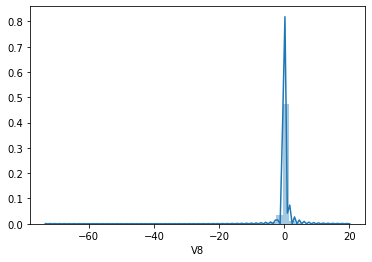

Distribution of the feature  V9


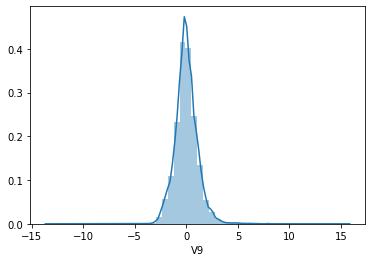

Distribution of the feature  V10


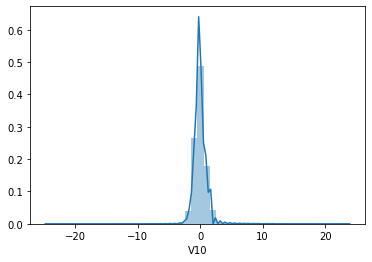

Distribution of the feature  V11


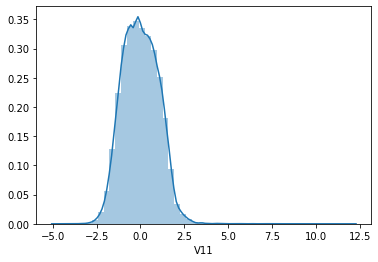

Distribution of the feature  V12


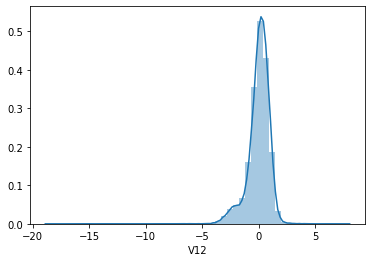

Distribution of the feature  V13


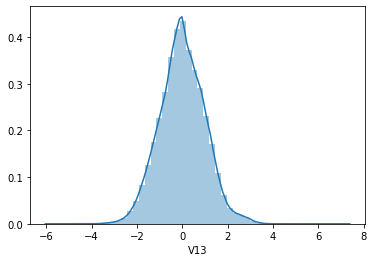

Distribution of the feature  V14


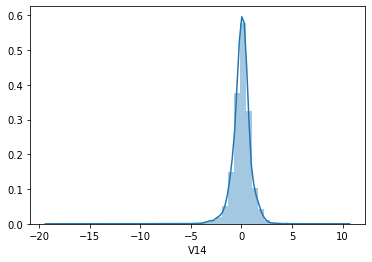

Distribution of the feature  V15


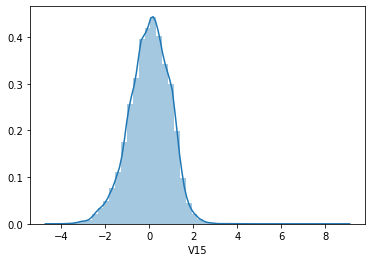

Distribution of the feature  V16


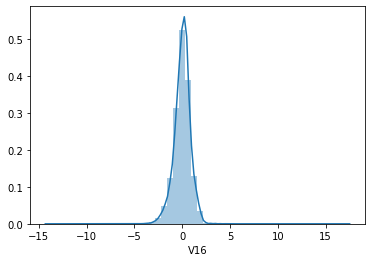

Distribution of the feature  V17


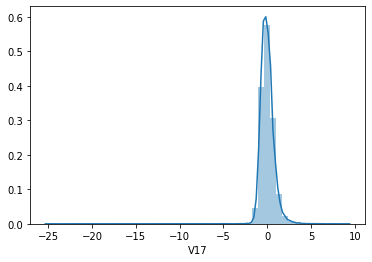

Distribution of the feature  V18


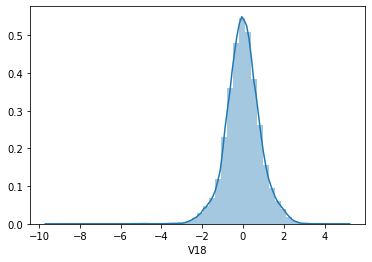

Distribution of the feature  V19


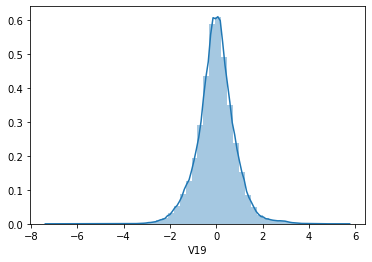

Distribution of the feature  V20


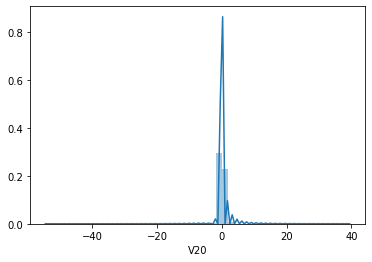

Distribution of the feature  V21


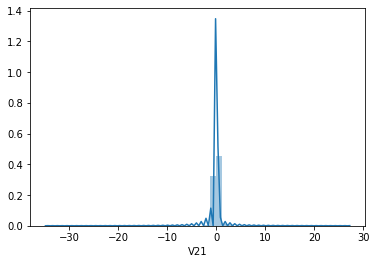

Distribution of the feature  V22


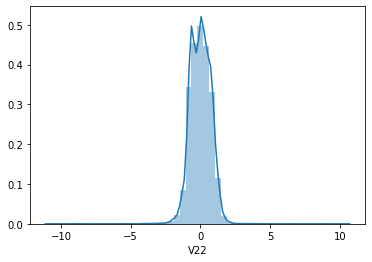

Distribution of the feature  V23


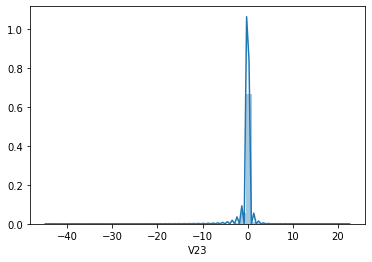

Distribution of the feature  V24


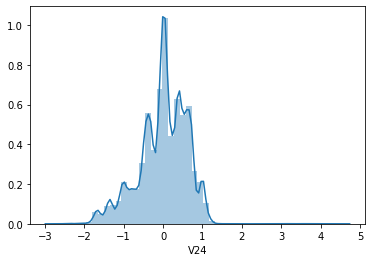

Distribution of the feature  V25


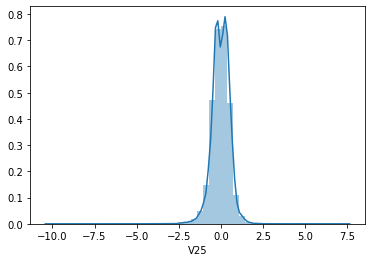

Distribution of the feature  V26


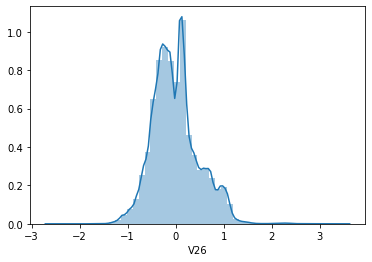

Distribution of the feature  V27


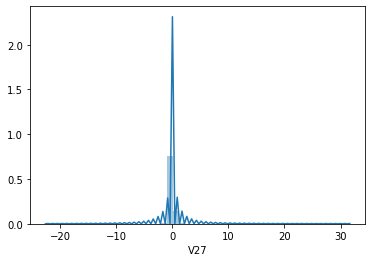

Distribution of the feature  V28


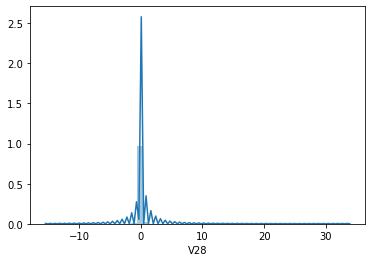

Distribution of the feature  Amount


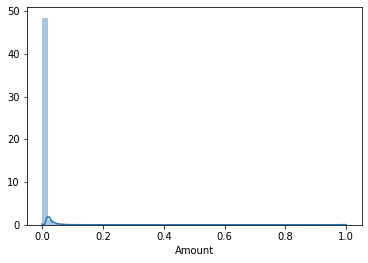

In [21]:
# Checking the distribution of all the variables.
for col in X.columns:
    print("Distribution of the feature ", col)
    sns.distplot(X[col])
    plt.show()

So from above graph it seems like distribution of variable is 'Gaussians' and we can see that few columns are skewed, So we need to mitigate that

In [22]:
X.skew(axis = 0, skipna = True)

V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
dtype: float64

In [23]:
# Few variables are skewed hence we need to power transform the skewed variables so it can be in noraml distribution
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)
X_transformed = pd.DataFrame(pt.fit_transform(X), columns = X.columns)

Distribution of the feature  V1


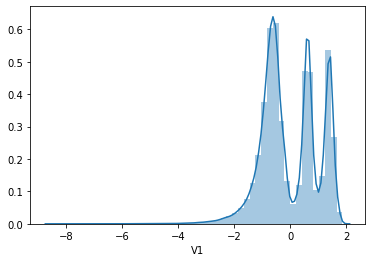

Distribution of the feature  V2


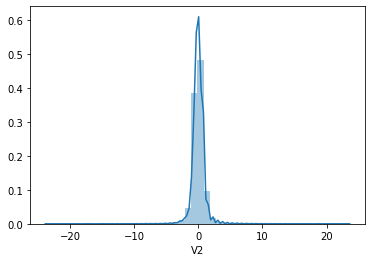

Distribution of the feature  V3


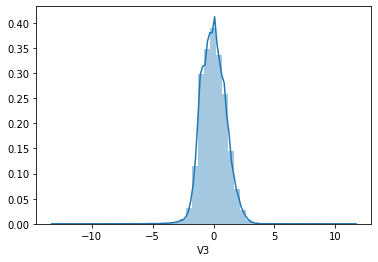

Distribution of the feature  V4


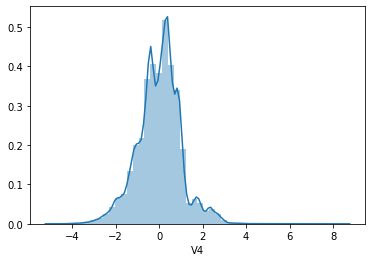

Distribution of the feature  V5


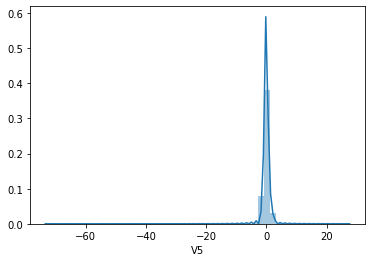

Distribution of the feature  V6


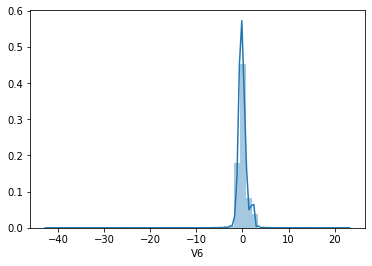

Distribution of the feature  V7


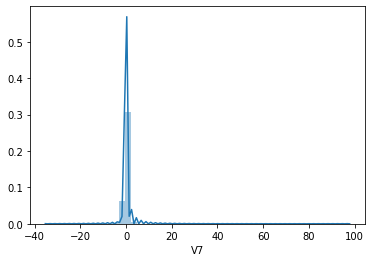

Distribution of the feature  V8


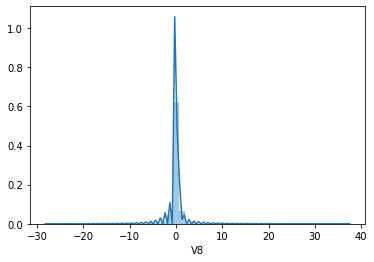

Distribution of the feature  V9


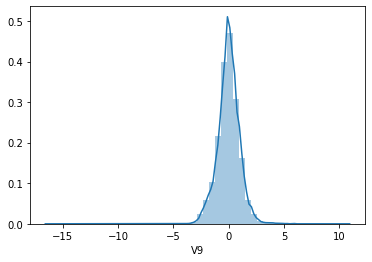

Distribution of the feature  V10


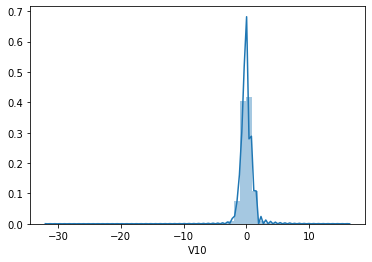

Distribution of the feature  V11


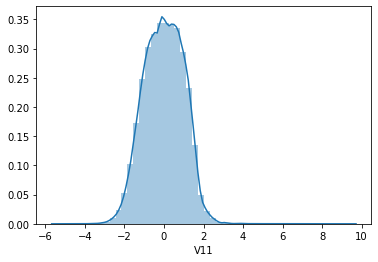

Distribution of the feature  V12


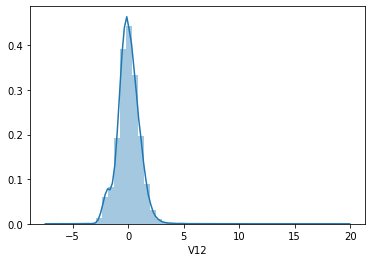

Distribution of the feature  V13


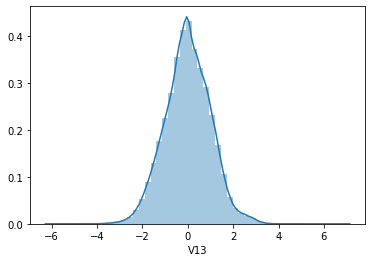

Distribution of the feature  V14


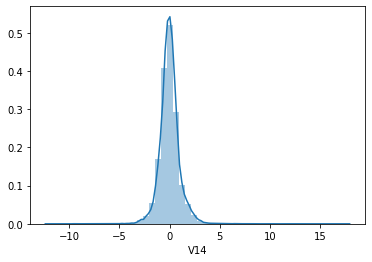

Distribution of the feature  V15


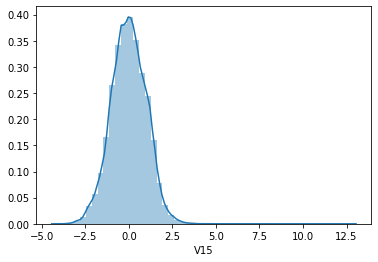

Distribution of the feature  V16


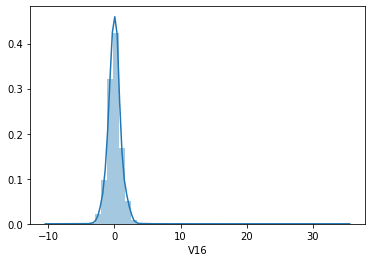

Distribution of the feature  V17


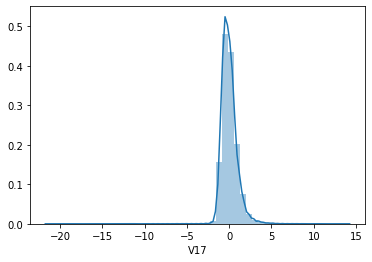

Distribution of the feature  V18


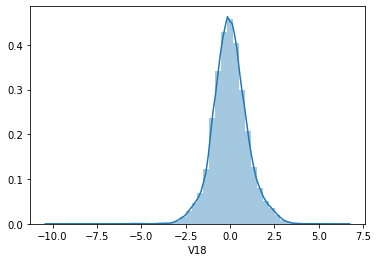

Distribution of the feature  V19


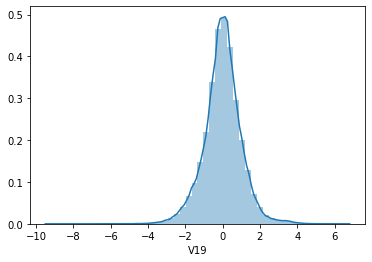

Distribution of the feature  V20


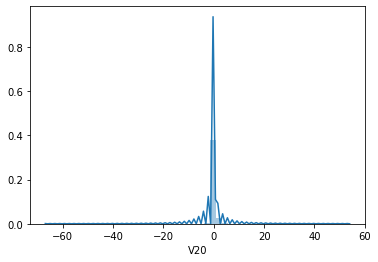

Distribution of the feature  V21


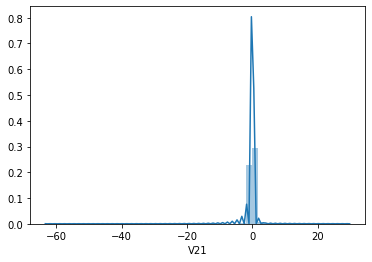

Distribution of the feature  V22


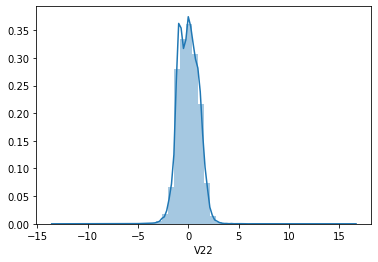

Distribution of the feature  V23


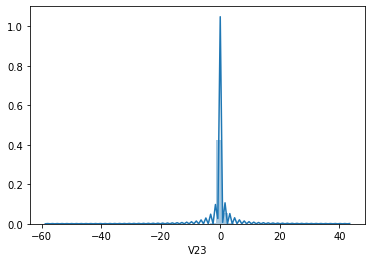

Distribution of the feature  V24


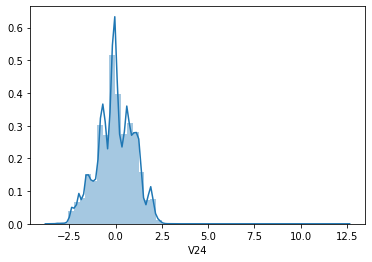

Distribution of the feature  V25


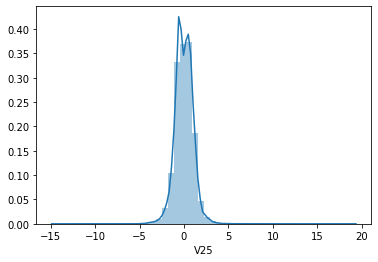

Distribution of the feature  V26


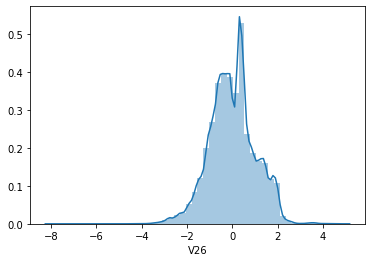

Distribution of the feature  V27


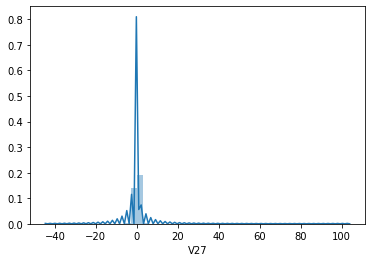

Distribution of the feature  V28


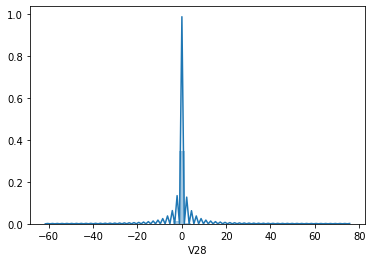

Distribution of the feature  Amount


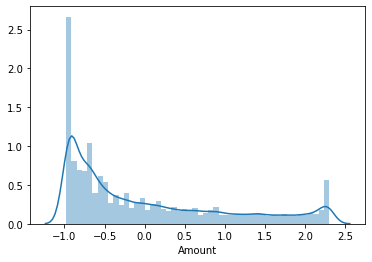

In [24]:
# Checking the skewness of all the variables after mitigating it.
for col in X_transformed.columns:
    print("Distribution of the feature ", col)
    sns.distplot(X_transformed[col])
    plt.show()

In [25]:
# Checking the skewness score again
X_transformed.skew(axis = 0, skipna = True)

V1       -0.218003
V2        0.334852
V3       -0.079980
V4        0.018930
V5       -1.170100
V6       -1.937469
V7        2.594575
V8        2.297590
V9       -0.048343
V10      -1.318334
V11       0.060890
V12       0.158932
V13       0.006134
V14       0.105966
V15       0.013157
V16       0.137437
V17      -0.791141
V18      -0.059630
V19       0.015231
V20      -0.923653
V21      -1.966863
V22      -0.025686
V23      -0.249209
V24       0.112492
V25       0.077895
V26      -0.024102
V27       3.465031
V28       1.069193
Amount    0.969991
dtype: float64

In [26]:
# After power transformation variable distribution can be seen normally distributed
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724


So by doing the above power transformation we can handel the outlier present in our dataset

### Splitting the DataSet in to Train and Test Set


In [27]:
# Spliting the data set with 80% data in train set and 20% data test set, With stratified so good amount of minority class portion can availabe in test set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 1, stratify = y)

In [28]:
# Checking the size of fraud values in train and test data
print('Total number of Fraud Transaction : ', np.sum(y))
print('Total number of Fraud Transaction in train data : ', np.sum(y_train))
print('Total number of Fraud Transaction in test data: ', np.sum(y_test))

Total number of Fraud Transaction :  492
Total number of Fraud Transaction in train data :  394
Total number of Fraud Transaction in test data:  98


# Model Building for imbalance dataset -->

In [29]:
# Chekcing model with logistic Regression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# Cheacking the prediction on test data
y_pred_lr = LogReg.predict(X_test)

In [31]:
# Checking the matrix
print("Accuracy of Logistic Regression is : ", metrics.accuracy_score(y_test, y_pred_lr))
print("Sencitivity of Logistic Regression is : ", metrics.recall_score(y_test, y_pred_lr))
print("ROC of Logistic Regression is : ", metrics.roc_auc_score(y_test, y_pred_lr))

Accuracy of Logistic Regression is :  0.9993328885923949
Sencitivity of Logistic Regression is :  0.7142857142857143
ROC of Logistic Regression is :  0.8570549280488786


In [32]:
# Function to plot ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [84]:
# Function to get best feature for a model
def imp_feature(clf):
    var_imp = []
    for i in clf.feature_importances_:
        var_imp.append(i)
    print('Top variable =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
    print('2nd Top variable =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
    print('3rd Top variable =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

    # Variable on Index-16 and Index-13 seems to be the top 2 variables
    top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
    second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

    X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
    X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

    np.random.shuffle(X_train_0)

    plt.rcParams['figure.figsize'] = [15, 10]

    plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
    plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
    plt.legend()

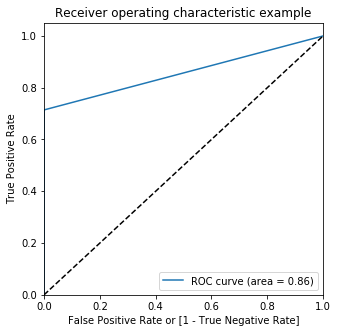

In [34]:
# Roc curve for Logistic regression model
draw_roc(y_test, y_pred_lr)

### Logistic Regression

Performing hypertuning for Logistic Regression
Performing Cross-Validation on the data, so we can tune with hyperparameter and get the best suited paramneter

In [35]:
#hyperparameter tuning
num_C =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000]
cv_num = 5
params={'C':num_C,'penalty':['l1', 'l2']}
#create 5 folds
folds = StratifiedKFold(n_splits = cv_num,shuffle = True,random_state=4)
#create randomsearch
lr_model = RandomizedSearchCV(estimator = LogReg, param_distributions = params, cv=folds, scoring = 'roc_auc')
lr_model.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'penalty': ['l1', 'l2']},
   

In [228]:
print("Best ROC score for LR model is : ", lr_model.best_score_)
print("Best parameter for LR model is : ", lr_model.best_params_)
print("Best estimator for LR model is : ", lr_model.best_estimator_)

Best ROC score for LR model is :  0.9806324382289775
Best parameter for LR model is :  {'penalty': 'l2', 'C': 0.001}
Best estimator for LR model is :  LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [231]:
# buliding model on best parameter
lr_1 = LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
lr_1.fit(X_train, y_train)
y_pred_lr = lr_1.predict(X_test)
print("ROC score of the LR model with hypertune  parameter is : ", metrics.roc_auc_score(y_test, y_pred_lr))

ROC score of the LR model with hypertune  parameter is :  0.7907635690742252


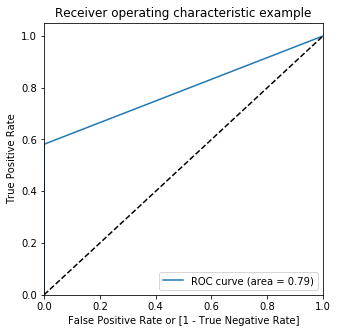

In [232]:
# Checking ROC curve of LR
draw_roc(y_test, y_pred_lr)

In [42]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[56854    10]
 [   28    70]]


In [44]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_lr, average='binary')
print("Sensitivit|y: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivit|y: 	0.71
Specificity: 	1.0


In [45]:
print('Precision score for the LR model is : ', precision_score(y_test, y_pred_lr, average='binary'))
print('Recall score for the LR model is : ', recall_score(y_test, y_pred_lr, average='binary'))
print('F-1 score for the LR model is : ', f1_score(y_test, y_pred_lr, average='binary'))

Precision score for the LR model is :  0.875
Recall score for the LR model is :  0.7142857142857143
F-1 score for the LR model is :  0.7865168539325842


### KNN 

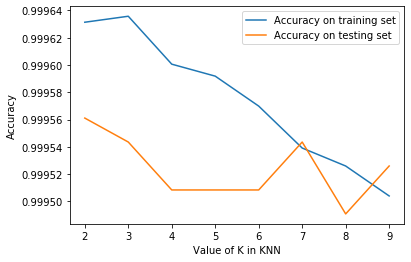

In [39]:
# Choosing optimal value of K
k_range = range(2, 10)
train_score=[]
test_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))
    
plt.plot(k_range,train_score,label= 'Accuracy on training set')
plt.plot(k_range,test_score,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [57]:
print("Train Accuracy Value for all the K values is : \n", train_score)
print("Test Accuracy Value for all the K values is : \n", test_score)

Train Accuracy Value for all the K values is : 
 [0.9996313283153021, 0.9996357172639294, 0.9996006056749106, 0.9995918277776559, 0.9995698830345191, 0.9995391603941276, 0.9995259935482456, 0.9995040488051088]
Test Accuracy Value for all the K values is : 
 [0.9995611109160493, 0.9995435553526912, 0.9995084442259752, 0.9995084442259752, 0.9995084442259752, 0.9995435553526912, 0.9994908886626171, 0.9995259997893332]


In [48]:
# 3 seems to be good number for selecting k, So builiding model with k=3
knn_2 = KNeighborsClassifier(n_neighbors=3)
knn_2.fit(X_train,y_train)
print('Accuracy of KNN model where k=3 on the testing dataset is : ', knn_2.score(X_test,y_test))

Accuracy of KNN model where k=3 on the testing dataset is :  0.9995435553526912


In [49]:
y_pred_knn = knn_2.predict(X_test)

In [50]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Metrix for KNN Model is : \n", cm)

Confusion Metrix for KNN Model is : 
 [[56855     9]
 [   17    81]]


In [51]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_knn, average='binary')
print("Sensitivit|y: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivit|y: 	0.83
Specificity: 	1.0


In [52]:
print('Precision score for the KNN model is : ', precision_score(y_test, y_pred_knn, average='binary'))
print('Recall score for the KNN model is : ', recall_score(y_test, y_pred_knn, average='binary'))
print('F-1 score for the KNN model is : ', f1_score(y_test, y_pred_knn, average='binary'))

Precision score for the LR model is :  0.9
Recall score for the LR model is :  0.826530612244898
F-1 score for the LR model is :  0.8617021276595744


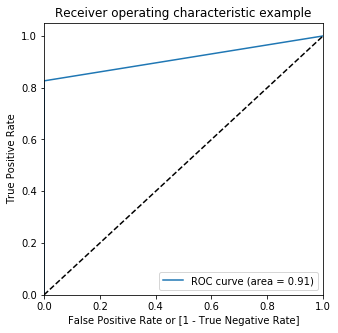

In [53]:
draw_roc(y_test, y_pred_knn)

### Random Forest -->

In [58]:
# Buliding a model with random forest classifier
randomForest = RandomForestClassifier()
# hyperparameter space
n_estimators = [100, 200, 300, 400, 500]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 20, 30, 40, 50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,'bootstrap': bootstrap}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
# Tuning the model using RandomizedSearchCV
random_forest = RandomizedSearchCV(estimator = randomForest, param_distributions = random_grid, n_iter = 2, cv = folds, verbose=0, random_state=100 , n_jobs = -1)

In [59]:
# Fitting the model
random_forest.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=...
                     

In [61]:
print("Best AUC for random forest model : \n", random_forest.best_score_)
print("Best Params for random forest model :\n ", random_forest.best_params_)
print("Best Estimator for random forest model :\n ",random_forest.best_estimator_)

Best AUC for random forest model : 
 0.9995216045996183
Best Params for random forest model :
  {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Estimator for random forest model :
  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [65]:
# Building the random forest model with best parameter
# Building the model with the best parameter got from the randomised search
rf_model_3 = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf_model_3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
y_pred_rf = rf_model_3.predict(X_test)

In [67]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Metrix for Random Forest Model is : \n", cm)

Confusion Metrix for Random Forest Model is : 
 [[56857     7]
 [   14    84]]


In [68]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_rf, average='binary')
print("Sensitivit|y: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivit|y: 	0.86
Specificity: 	1.0


In [69]:
print('Precision score for the Random Forest model is : ', precision_score(y_test, y_pred_rf, average='binary'))
print('Recall score for the Random Forest model is : ', recall_score(y_test, y_pred_rf, average='binary'))
print('F-1 score for the Random Forest model is : ', f1_score(y_test, y_pred_rf, average='binary'))

Precision score for the Random Forest model is :  0.9230769230769231
Recall score for the Random Forest model is :  0.8571428571428571
F-1 score for the Random Forest model is :  0.888888888888889


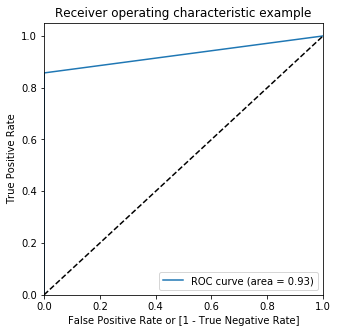

In [70]:
draw_roc(y_test, y_pred_rf)

### XGBoost -->

In [62]:
# Running randomised search to get to get the best param for XG boost
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)
xg_boost = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=4, cv=skf, verbose=3, random_state=1001)


In [63]:
xg_boost.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 74.7min finished


[04:19:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1001, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='deprecated', n_ite

In [64]:
print("Best AUC for XGB model : \n", xg_boost.best_score_)
print("Best Params for XGB model :\n ", xg_boost.best_params_)
print("Best Estimator for XGB model :\n ",xg_boost.best_estimator_)

Best AUC for XGB model : 
 0.9812843640395542
Best Params for XGB model :
  {'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 0.8}
Best Estimator for XGB model :
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [72]:
xgb_model_4 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_model_4.fit(X_train, y_train)

[13:20:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
y_pred_xgb = xgb_model_4.predict(X_test)

In [74]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Metrix for XG Boost Model is : \n", cm)

Confusion Metrix for XG Boost Model is : 
 [[56858     6]
 [   14    84]]


In [75]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_xgb, average='binary')
print("Sensitivit|y: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivit|y: 	0.86
Specificity: 	1.0


In [76]:
print('Precision score for the XG Boost model is : ', precision_score(y_test, y_pred_xgb, average='binary'))
print('Recall score for the XG Boost model is : ', recall_score(y_test, y_pred_xgb, average='binary'))
print('F-1 score for the XG Boost model is : ', f1_score(y_test, y_pred_xgb, average='binary'))

Precision score for the XG Boost model is :  0.9333333333333333
Recall score for the XG Boost model is :  0.8571428571428571
F-1 score for the XG Boost model is :  0.8936170212765957


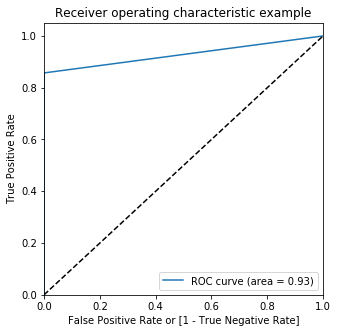

In [78]:
draw_roc(y_test, y_pred_xgb)

### Important features -

Important feature for Random Forest model is --> 

Top variable = 17
2nd Top variable = 12
3rd Top variable = 14


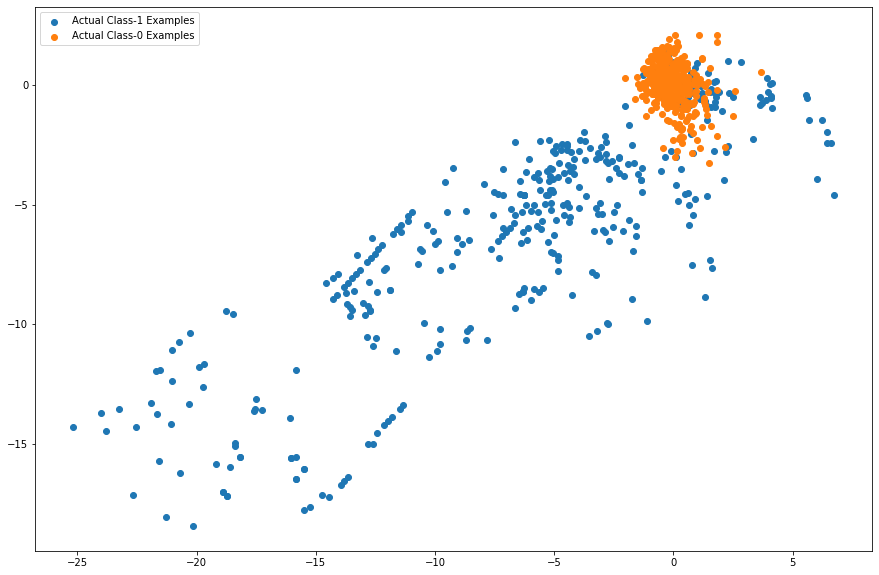

In [85]:
print("Important feature for Random Forest model is --> \n")
imp_feature(rf_model_3)

Important feature for XG Boost model is --> 

Top variable = 17
2nd Top variable = 12
3rd Top variable = 14


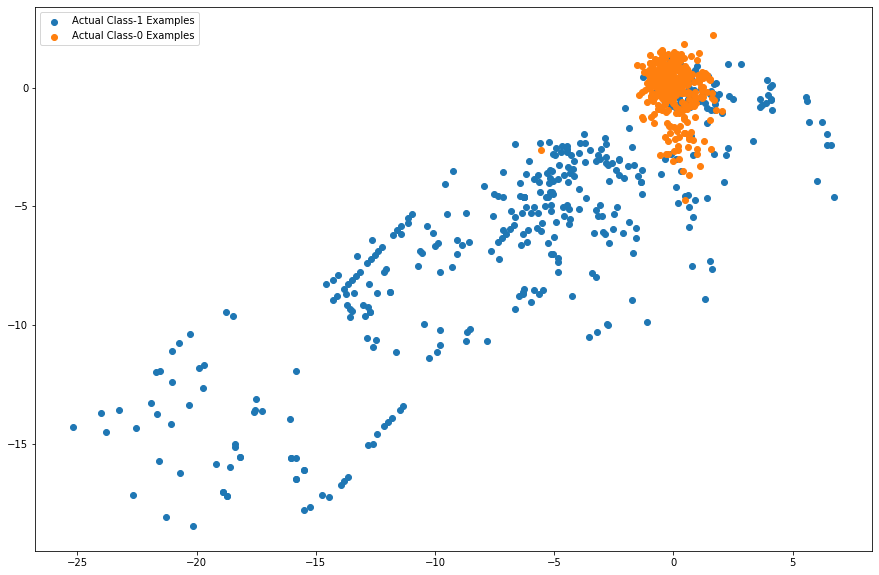

In [86]:
print("Important feature for XG Boost model is --> \n")
imp_feature(xgb_model_4)

# Model building after balancing data set for minority class

Till now we have performed model building with only imbalace data set, now we will create model after balacing our dataset with balancing technique like SMOTE, ADASYN

## Balancing dataset by smote technique -

In [94]:
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

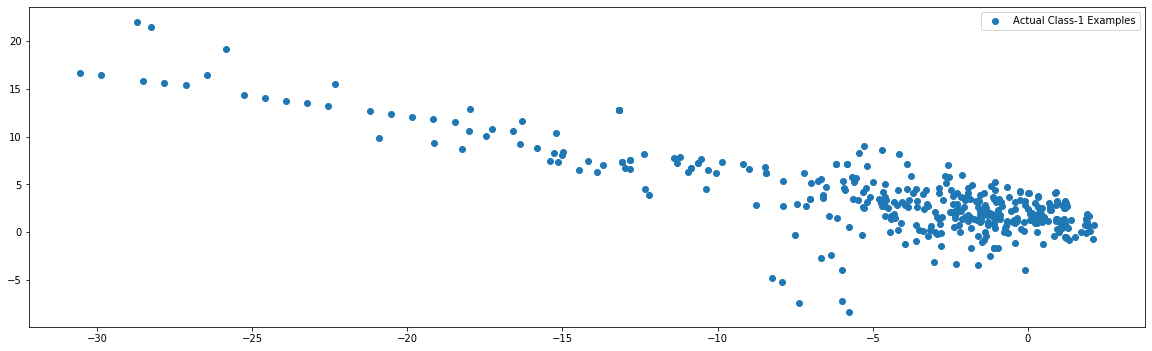

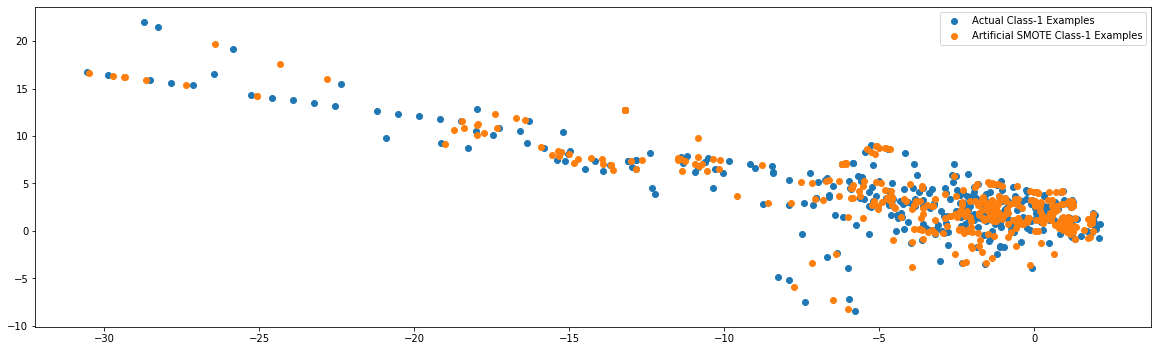

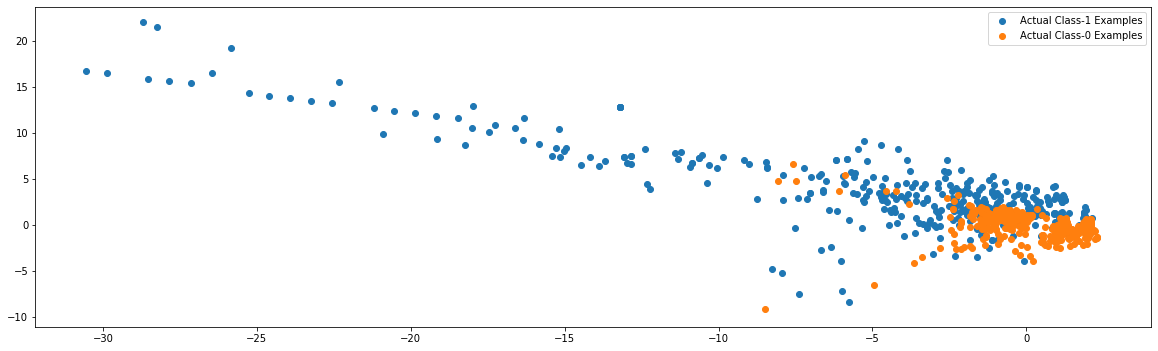

In [95]:
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()
plt.show()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()
plt.show()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

In [96]:
# Checking the size of fraud values in train and test data
print('Total number of Fraud Transaction : ', np.sum(y_train_smote))
print('Total number of Fraud Transaction in test data: ', np.sum(y_test))

Total number of Fraud Transaction :  227451
Total number of Fraud Transaction in test data:  98


 ### Logistic Regression -

In [97]:
#hyperparameter tuning
LogReg_smote = LogisticRegression()
num_C =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000]
cv_num = 5
params={'C':num_C,'penalty':['l1', 'l2']}
#create 5 folds
folds = StratifiedKFold(n_splits = cv_num,shuffle = True,random_state=4)
#create randomsearch
lr_model_smote = RandomizedSearchCV(estimator = LogReg_smote, param_distributions = params, cv=folds, scoring = 'roc_auc')
lr_model_smote.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'penalty': ['l1', 'l2']},
   

In [98]:
print("Best ROC score for LR model is : \n", lr_model_smote.best_score_)
print("Best parameter for LR model is : \n", lr_model_smote.best_params_)
print("Best Estimator for LR model is :\n ",lr_model_smote.best_estimator_)

Best ROC score for LR model is : 
 0.9886722227335711
Best parameter for LR model is : 
 {'penalty': 'l2', 'C': 1000}
Best Estimator for LR model is :
  LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [100]:
lr_smote_1 = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
lr_smote_1.fit(X_train_smote, y_train_smote)
y_pred_smote_lr = lr_smote_1.predict(X_test)
print("ROC score of the LR model with hypertune  parameter is : ", metrics.roc_auc_score(y_test, y_pred_smote_lr))

ROC score of the LR model with hypertune  parameter is :  0.9461701675605526


In [101]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_smote_lr)
print(cm)

[[55384  1480]
 [    8    90]]


In [102]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_smote_lr, average='binary')
print("Sensitivit|y: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivit|y: 	0.92
Specificity: 	0.97


In [103]:
print('Precision score for the LR model is : ', precision_score(y_test, y_pred_smote_lr, average='binary'))
print('Recall score for the LR model is : ', recall_score(y_test, y_pred_smote_lr, average='binary'))
print('F-1 score for the LR model is : ', f1_score(y_test, y_pred_smote_lr, average='binary'))

Precision score for the LR model is :  0.05732484076433121
Recall score for the LR model is :  0.9183673469387755
F-1 score for the LR model is :  0.1079136690647482


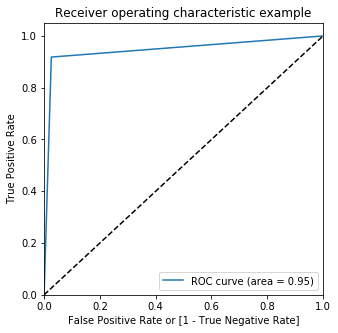

In [104]:
draw_roc(y_test, y_pred_smote_lr)

### KNN -

In [105]:
# Choosing optimal value of K
k_range = range(2, 10)
train_score=[]
test_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train_smote,y_train_smote))
    test_score.append(knn.score(X_test,y_test))


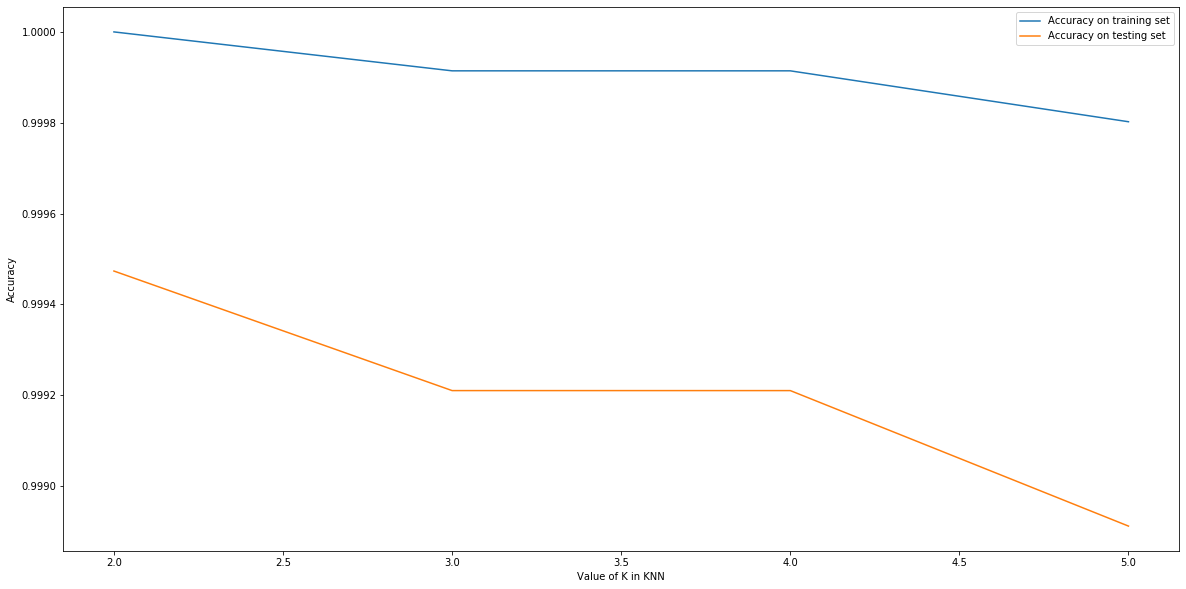

In [235]:
# Plotting   

plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(k_range,train_score,label= 'Accuracy on training set')
plt.plot(k_range,test_score,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [107]:
print("Train Accuracy Value for all the K values is : \n", train_score)
print("Test Accuracy Value for all the K values is : \n", test_score)

Train Accuracy Value for all the K values is : 
 [0.906478758062176, 0.9157181107139559, 0.8999586724173558, 0.9055576805553723, 0.8958676813907172, 0.8988749225107825, 0.8941244487823751, 0.8967711726921402]
Test Accuracy Value for all the K values is : 
 [0.9995611109160493, 0.9995435553526912, 0.9995084442259752, 0.9995084442259752, 0.9995084442259752, 0.9995435553526912, 0.9994908886626171, 0.9995259997893332]


In [236]:
# 2 seems to be good number for selecting k, So builiding model with k=2
knn_smote_2 = KNeighborsClassifier(n_neighbors=2)
knn_smote_2.fit(X_train_smote,y_train_smote)
print('Accuracy of KNN model where k=3 on the testing dataset is : ', knn_smote_2.score(X_test,y_test))

Accuracy of KNN model where k=3 on the testing dataset is :  0.9991397773954567


In [237]:
y_pred_smote_knn = knn_smote_2.predict(X_test)

In [238]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_smote_knn)
print("Confusion Metrix for KNN Model is : \n", cm)

Confusion Metrix for KNN Model is : 
 [[56829    35]
 [   14    84]]


In [239]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_smote_knn, average='binary')
print("Sensitivit|y: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivit|y: 	0.86
Specificity: 	1.0


In [240]:
print('Precision score for the KNN model is : ', precision_score(y_test, y_pred_smote_knn, average='binary'))
print('Recall score for the KNN model is : ', recall_score(y_test, y_pred_smote_knn, average='binary'))
print('F-1 score for the KNN model is : ', f1_score(y_test, y_pred_smote_knn, average='binary'))

Precision score for the KNN model is :  0.7058823529411765
Recall score for the KNN model is :  0.8571428571428571
F-1 score for the KNN model is :  0.7741935483870968


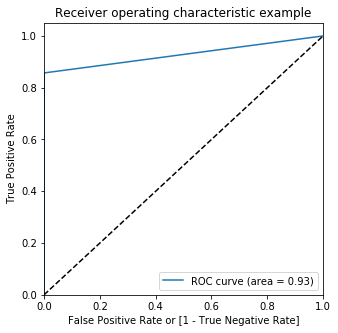

In [241]:
draw_roc(y_test, y_pred_smote_knn)

### Random Forest - 

In [108]:
# Buliding a model with random forest classifier
rf_smote = RandomForestClassifier()
# hyperparameter space
n_estimators = [100, 200, 300, 400, 500]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 20, 30, 40, 50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,'bootstrap': bootstrap}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
# Tuning the model using RandomizedSearchCV
rf_model_smote = RandomizedSearchCV(estimator = rf_smote, param_distributions = random_grid, n_iter = 2, cv = folds, verbose=0, random_state=100 , n_jobs = -1)

In [109]:
# Fitting the model
rf_model_smote.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=...
                     

In [110]:
print("Best AUC for random forest model : \n", rf_model_smote.best_score_)
print("Best Params for random forest model :\n ", rf_model_smote.best_params_)
print("Best Estimator for random forest model :\n ",rf_model_smote.best_estimator_)

Best AUC for random forest model : 
 0.9998153449014883
Best Params for random forest model :
  {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Estimator for random forest model :
  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [119]:
# Building the random forest model with best parameter
# Building the model with the best parameter got from the randomised search
rf_model_smote_3 = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf_model_smote_3.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
y_pred_smote_rf = rf_model_smote_3.predict(X_test)

In [121]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_smote_rf)
print("Confusion Metrix for Random Forest Model is : \n", cm)

Confusion Metrix for Random Forest Model is : 
 [[56833    31]
 [   12    86]]


In [122]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_smote_rf, average='binary')
print("Sensitivit|y: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivit|y: 	0.88
Specificity: 	1.0


In [123]:
print('Precision score for the Random Forest model is : ', precision_score(y_test, y_pred_smote_rf, average='binary'))
print('Recall score for the Random Forest model is : ', recall_score(y_test, y_pred_smote_rf, average='binary'))
print('F-1 score for the Random Forest model is : ', f1_score(y_test, y_pred_smote_rf, average='binary'))

Precision score for the Random Forest model is :  0.7350427350427351
Recall score for the Random Forest model is :  0.8775510204081632
F-1 score for the Random Forest model is :  0.8000000000000002


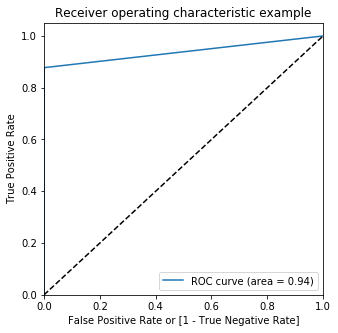

In [124]:
draw_roc(y_test, y_pred_smote_rf)

Top variable = 14
2nd Top variable = 10
3rd Top variable = 4


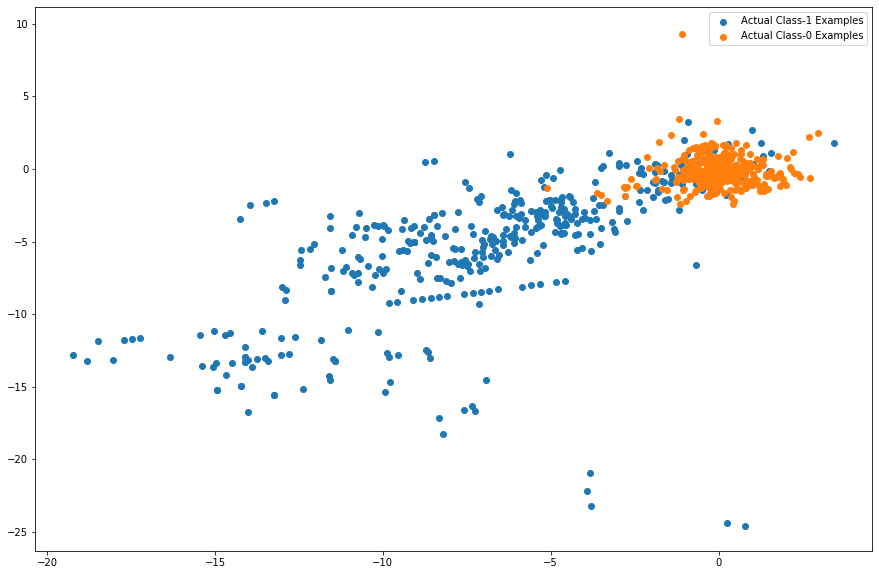

In [126]:
imp_feature(rf_model_smote_3)

### XG Boost -

In [111]:
xgb_smote = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)
xg_boost_smote = RandomizedSearchCV(xgb_smote, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=4, cv=skf, verbose=3, random_state=1001)


In [112]:
xg_boost_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 192.8min finished


[00:00:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1001, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='deprecated', n_ite

In [125]:
print("Best AUC for XGB model : \n", xg_boost_smote.best_score_)
print("Best Params for XGB model :\n ", xg_boost_smote.best_params_)
print("Best Estimator for XGB model :\n ",xg_boost_smote.best_estimator_)

Best AUC for XGB model : 
 0.9999109857954673
Best Params for XGB model :
  {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8}
Best Estimator for XGB model :
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [127]:
xgb_model_smote_4 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_model_smote_4.fit(X_train_smote, y_train_smote)

[01:03:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [203]:
y_pred_smote_xgb = xgb_model_smote_4.predict(X_test.values)

In [204]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_smote_xgb)
print("Confusion Metrix for XG Boost Model is : \n", cm)

Confusion Metrix for XG Boost Model is : 
 [[56658   206]
 [    8    90]]


In [205]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_smote_xgb, average='binary')
print("Sensitivit|y: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivit|y: 	0.92
Specificity: 	1.0


In [206]:
print('Precision score for the XG Boost model is : ', precision_score(y_test, y_pred_smote_xgb, average='binary'))
print('Recall score for the XG Boost model is : ', recall_score(y_test, y_pred_smote_xgb, average='binary'))
print('F-1 score for the XG Boost model is : ', f1_score(y_test, y_pred_smote_xgb, average='binary'))

Precision score for the XG Boost model is :  0.30405405405405406
Recall score for the XG Boost model is :  0.9183673469387755
F-1 score for the XG Boost model is :  0.4568527918781726


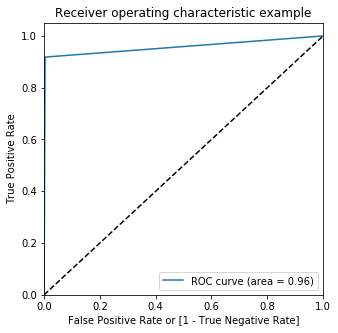

In [207]:
draw_roc(y_test, y_pred_smote_xgb)

Top variable = 14
2nd Top variable = 10
3rd Top variable = 4


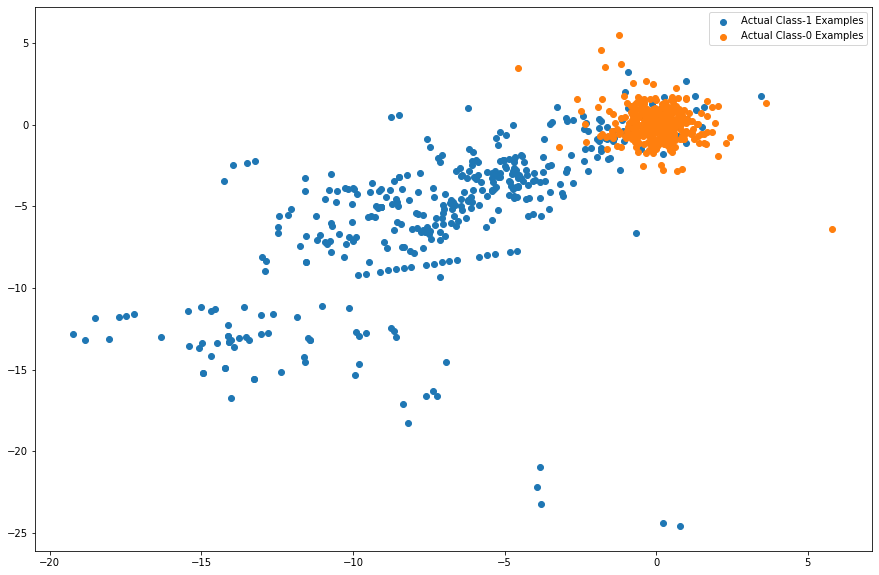

In [208]:
imp_feature(xgb_model_smote_4)

## Balancing dataset by ADASYN technique -->

In [130]:
ada = over_sampling.ADASYN(random_state=0)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

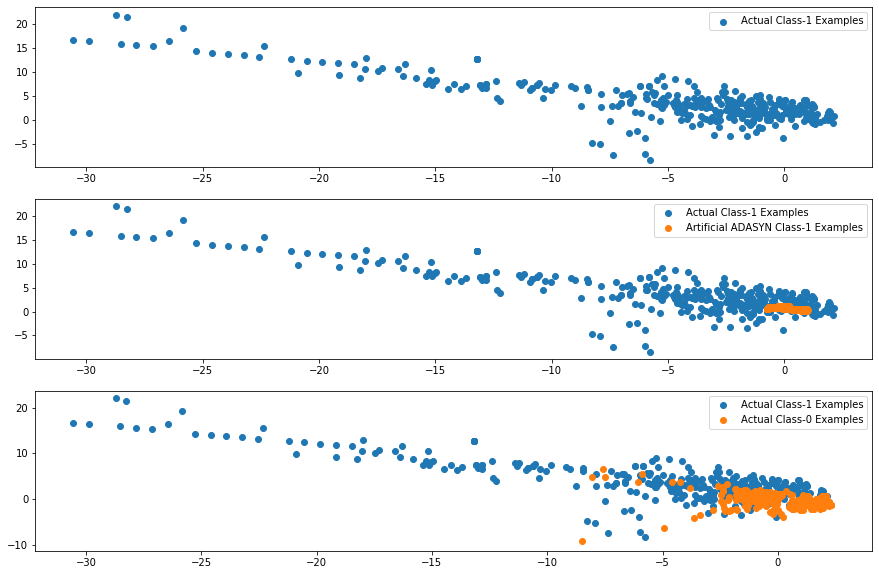

In [131]:
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_ada[X_train.shape[0]:]
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [15, 10]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Logistic Regression 

In [137]:
#hyperparameter tuning
num_C =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000]
cv_num = 5
params={'C':num_C,'penalty':['l1', 'l2']}
#create 5 folds
folds = StratifiedKFold(n_splits = cv_num,shuffle = True,random_state=4)
#create randomsearch
lr_model_ada = RandomizedSearchCV(estimator = LogReg, param_distributions = params, cv=folds, scoring = 'roc_auc')
lr_model_ada.fit(X_train_ada, y_train_ada)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'penalty': ['l1', 'l2']},
   

In [138]:
print("Best ROC score for LR model is :\n ", lr_model_ada.best_score_)
print("Best parameter for LR model is :\n ", lr_model_ada.best_params_)
print("Best Estimator for LR model :\n ",lr_model_ada.best_estimator_)

Best ROC score for LR model is :
  0.9591607920612353
Best parameter for LR model is :
  {'penalty': 'l2', 'C': 10}
Best Estimator for LR model :
  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [139]:
lr_ada_1 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
lr_ada_1.fit(X_train_ada, y_train_ada)
y_pred_ada_lr = lr_ada_1.predict(X_test)
print("ROC score of the LR model with hypertune  parameter is : ", metrics.roc_auc_score(y_test, y_pred_ada_lr))

ROC score of the LR model with hypertune  parameter is :  0.9336312993120714


In [140]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_ada_lr)
print(cm)

[[51637  5227]
 [    4    94]]


In [141]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_ada_lr, average='binary')
print("Sensitivit|y: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivit|y: 	0.96
Specificity: 	0.91


In [142]:
print('Precision score for the LR model is : ', precision_score(y_test, y_pred_ada_lr, average='binary'))
print('Recall score for the LR model is : ', recall_score(y_test, y_pred_ada_lr, average='binary'))
print('F-1 score for the LR model is : ', f1_score(y_test, y_pred_ada_lr, average='binary'))

Precision score for the LR model is :  0.017665852283405375
Recall score for the LR model is :  0.9591836734693877
F-1 score for the LR model is :  0.03469274773943532


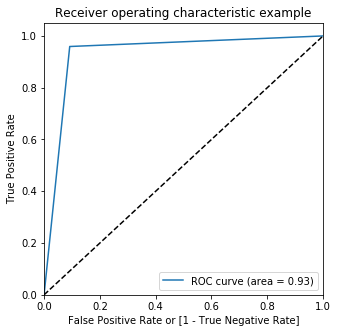

In [143]:
draw_roc(y_test, y_pred_ada_lr)

### KNN 

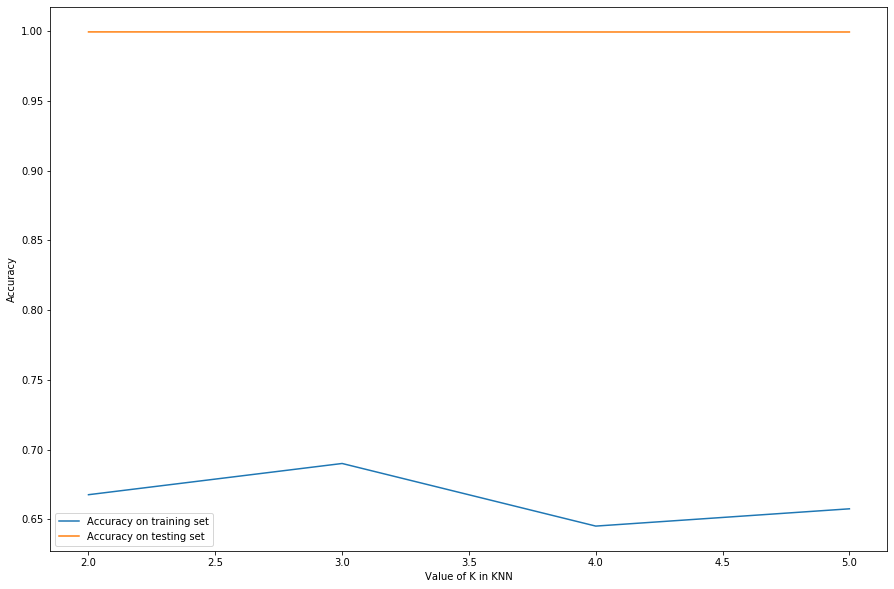

In [150]:
# Choosing optimal value of K
k_range = range(2, 6)
train_score=[]
test_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train_ada,y_train_ada))
    test_score.append(knn.score(X_test,y_test))

plt.plot(k_range,train_score,label= 'Accuracy on training set')
plt.plot(k_range,test_score,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [151]:
print("Train Accuracy Value for all the K values is : \n", train_score)
print("Test Accuracy Value for all the K values is : \n", test_score)

Train Accuracy Value for all the K values is : 
 [0.6677203711560487, 0.6901031648505286, 0.64521447429452, 0.6576061270204857]
Test Accuracy Value for all the K values is : 
 [0.9995611109160493, 0.9995435553526912, 0.9995084442259752, 0.9995084442259752]


In [164]:
# 3 seems to be good number for selecting k, So builiding model with k=3
knn_ada_2 = KNeighborsClassifier(n_neighbors=3)
knn_ada_2.fit(X_train_ada,y_train_ada)
print('Accuracy of KNN model where k=3 on the testing dataset is : ', knn_ada_2.score(X_test,y_test))

Accuracy of KNN model where k=3 on the testing dataset is :  0.9985428882412837


In [165]:
y_pred_ada_knn = knn_ada_2.predict(X_test)

In [166]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_ada_knn)
print("Confusion Metrix for KNN Model is : \n", cm)

Confusion Metrix for KNN Model is : 
 [[56794    70]
 [   13    85]]


In [167]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_ada_knn, average='binary')
print("Sensitivit|y: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivit|y: 	0.87
Specificity: 	1.0


In [168]:
print('Precision score for the KNN model is : ', precision_score(y_test, y_pred_ada_knn, average='binary'))
print('Recall score for the KNN model is : ', recall_score(y_test, y_pred_ada_knn, average='binary'))
print('F-1 score for the KNN model is : ', f1_score(y_test, y_pred_ada_knn, average='binary'))

Precision score for the KNN model is :  0.5483870967741935
Recall score for the KNN model is :  0.8673469387755102
F-1 score for the KNN model is :  0.6719367588932806


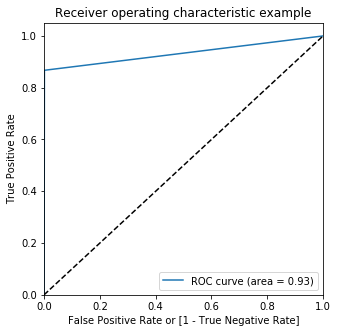

In [169]:
draw_roc(y_test, y_pred_ada_knn)

### Random Forest -

In [144]:
# Buliding a model with random forest classifier
randomForest = RandomForestClassifier()
# hyperparameter space
n_estimators = [100, 200, 300, 400, 500]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 20, 30, 40, 50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,'bootstrap': bootstrap}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
# Tuning the model using RandomizedSearchCV
random_forest_ada = RandomizedSearchCV(estimator = randomForest, param_distributions = random_grid, n_iter = 2, cv = folds, verbose=0, random_state=100 , n_jobs = -1)

In [145]:
# Fitting the model
random_forest_ada.fit(X_train_ada, y_train_ada)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=...
                     

In [146]:
print("Best AUC for random forest model : \n", random_forest_ada.best_score_)
print("Best Params for random forest model :\n ", random_forest_ada.best_params_)
print("Best Estimator for random forest model :\n ",random_forest_ada.best_estimator_)

Best AUC for random forest model : 
 0.9994702169063057
Best Params for random forest model :
  {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Estimator for random forest model :
  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [170]:
# Building the random forest model with best parameter
# Building the model with the best parameter got from the randomised search
rf_model_ada_3 = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf_model_ada_3.fit(X_train_ada,y_train_ada)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [171]:
y_pred_ada_rf = rf_model_ada_3.predict(X_test)

In [172]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_ada_rf)
print("Confusion Metrix for Random Forest Model is : \n", cm)

Confusion Metrix for Random Forest Model is : 
 [[56784    80]
 [   10    88]]


In [173]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_ada_rf, average='binary')
print("Sensitivit|y: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivit|y: 	0.9
Specificity: 	1.0


In [174]:
print('Precision score for the Random Forest model is : ', precision_score(y_test, y_pred_ada_rf, average='binary'))
print('Recall score for the Random Forest model is : ', recall_score(y_test, y_pred_ada_rf, average='binary'))
print('F-1 score for the Random Forest model is : ', f1_score(y_test, y_pred_ada_rf, average='binary'))

Precision score for the Random Forest model is :  0.5238095238095238
Recall score for the Random Forest model is :  0.8979591836734694
F-1 score for the Random Forest model is :  0.6616541353383458


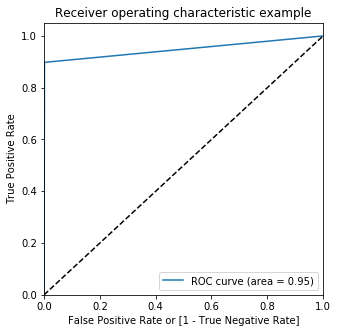

In [175]:
draw_roc(y_test, y_pred_ada_rf)

Top variable = 14
2nd Top variable = 4
3rd Top variable = 17


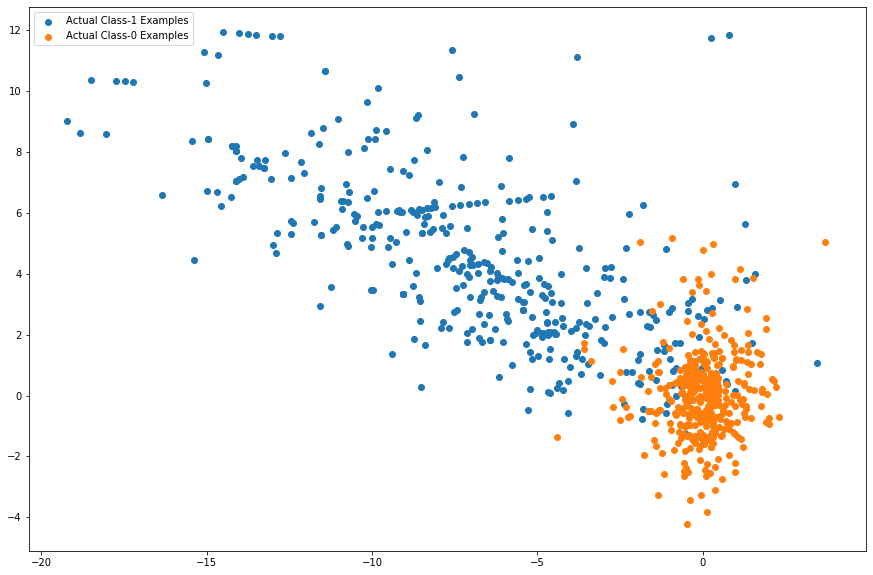

In [209]:
imp_feature(rf_model_ada_3)

### XG Boost -

In [147]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)
xg_boost_ada = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=4, cv=skf, verbose=3, random_state=1001)


In [148]:
xg_boost_ada.fit(X_train_ada, y_train_ada)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 172.7min finished


[06:22:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1001, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='deprecated', n_ite

In [149]:
print("Best AUC for XGB model : \n", xg_boost_ada.best_score_)
print("Best Params for XGB model :\n ", xg_boost_ada.best_params_)
print("Best Estimator for XGB model :\n ",xg_boost_ada.best_estimator_)

Best AUC for XGB model : 
 0.9997992893007916
Best Params for XGB model :
  {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8}
Best Estimator for XGB model :
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [194]:
xgb_model_ada_4 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_model_ada_4.fit(X_train_ada, y_train_ada)

[14:30:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [197]:
y_pred_ada_xgb = xgb_model_ada_4.predict(X_test.values)

In [198]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_ada_xgb)
print("Confusion Metrix for XG Boost Model is : \n", cm)

Confusion Metrix for XG Boost Model is : 
 [[56414   450]
 [    7    91]]


In [199]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_ada_xgb, average='binary')
print("Sensitivit|y: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivit|y: 	0.93
Specificity: 	0.99


In [200]:
print('Precision score for the XG Boost model is : ', precision_score(y_test, y_pred_ada_xgb, average='binary'))
print('Recall score for the XG Boost model is : ', recall_score(y_test, y_pred_ada_xgb, average='binary'))
print('F-1 score for the XG Boost model is : ', f1_score(y_test, y_pred_ada_xgb, average='binary'))

Precision score for the XG Boost model is :  0.16820702402957485
Recall score for the XG Boost model is :  0.9285714285714286
F-1 score for the XG Boost model is :  0.28482003129890454


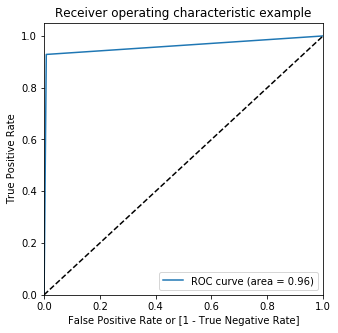

In [201]:
draw_roc(y_test, y_pred_ada_xgb)

Top variable = 14
2nd Top variable = 4
3rd Top variable = 8


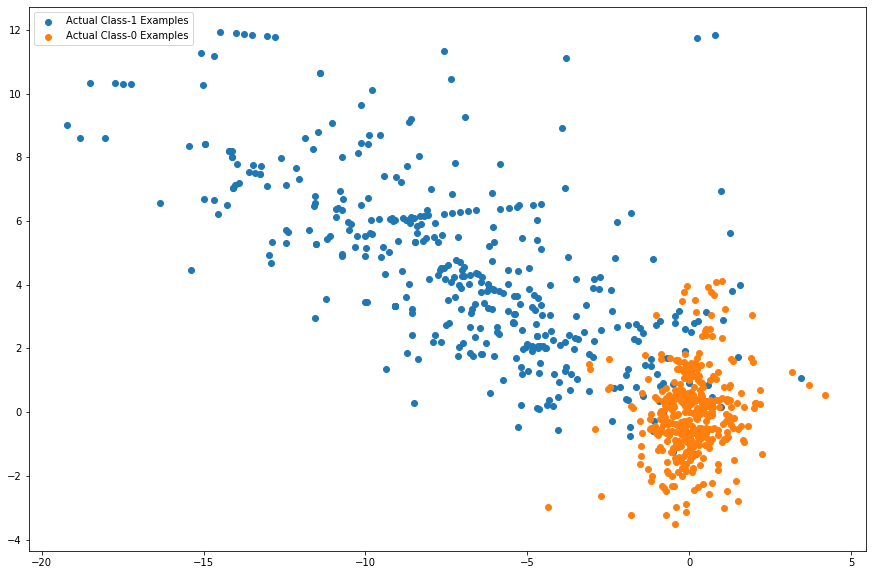

In [210]:
imp_feature(xgb_model_ada_4)

## Balancing dataset by Random Oversampling technique -->

In [153]:
# define oversampling strategy
# ada = over_sampling.ADASYN(random_state=0)
# X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
random_oversample = RandomOverSampler(random_state=0)
# fit and apply the transform
X_train_rand, y_train_rand = random_oversample.fit_resample(X_train, y_train)

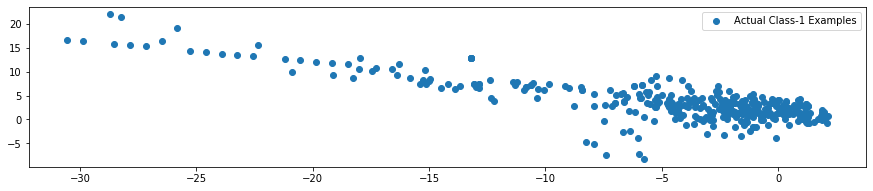

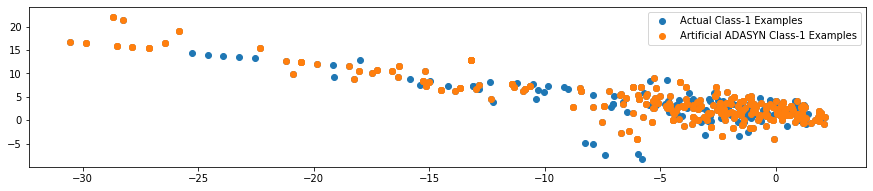

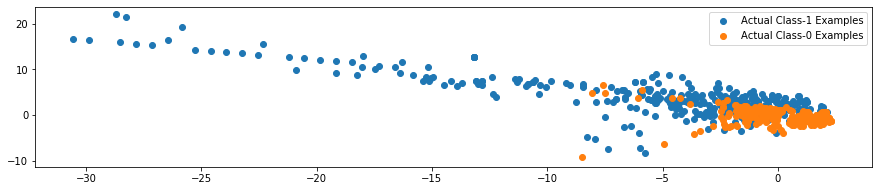

In [202]:
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_rand_1 = X_train_rand[X_train.shape[0]:]
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [15, 10]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()
plt.show()
plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_rand_1[:X_train_1.shape[0], 0], X_train_rand_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()
plt.show()
plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

### Logistic Regression -

In [154]:
#hyperparameter tuning
num_C =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000]
cv_num = 5
params={'C':num_C,'penalty':['l1', 'l2']}
#create 5 folds
folds = StratifiedKFold(n_splits = cv_num,shuffle = True,random_state=4)
#create randomsearch
lr_model_rand = RandomizedSearchCV(estimator = LogReg, param_distributions = params, cv=folds, scoring = 'roc_auc')
lr_model_rand.fit(X_train_rand, y_train_rand)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'penalty': ['l1', 'l2']},
   

In [155]:
print("Best ROC score for LR model is : \n", lr_model_rand.best_score_)
print("Best parameter for LR model is : \n", lr_model_rand.best_params_)
print("Best Estimator for LR model is : \n", lr_model_rand.best_estimator_)

Best ROC score for LR model is : 
 0.9857618541358963
Best parameter for LR model is : 
 {'penalty': 'l2', 'C': 10}
Best Estimator for LR model is : 
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [176]:
lr_rand_1 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
lr_rand_1.fit(X_train_rand, y_train_rand)
y_pred_rand_lr = lr_rand_1.predict(X_test)
print("ROC score of the LR model with hypertune  parameter is : ", metrics.roc_auc_score(y_test, y_pred_rand_lr))

ROC score of the LR model with hypertune  parameter is :  0.947031872681543


In [177]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_rand_lr)
print(cm)

[[55482  1382]
 [    8    90]]


In [178]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_rand_lr, average='binary')
print("Sensitivit|y: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivit|y: 	0.92
Specificity: 	0.98


In [179]:
print('Precision score for the LR model is : ', precision_score(y_test, y_pred_rand_lr, average='binary'))
print('Recall score for the LR model is : ', recall_score(y_test, y_pred_rand_lr, average='binary'))
print('F-1 score for the LR model is : ', f1_score(y_test, y_pred_rand_lr, average='binary'))

Precision score for the LR model is :  0.06114130434782609
Recall score for the LR model is :  0.9183673469387755
F-1 score for the LR model is :  0.11464968152866242


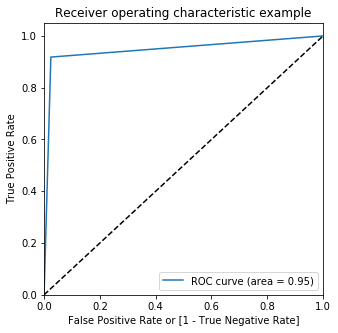

In [180]:
draw_roc(y_test, y_pred_rand_lr)

### KNN - 

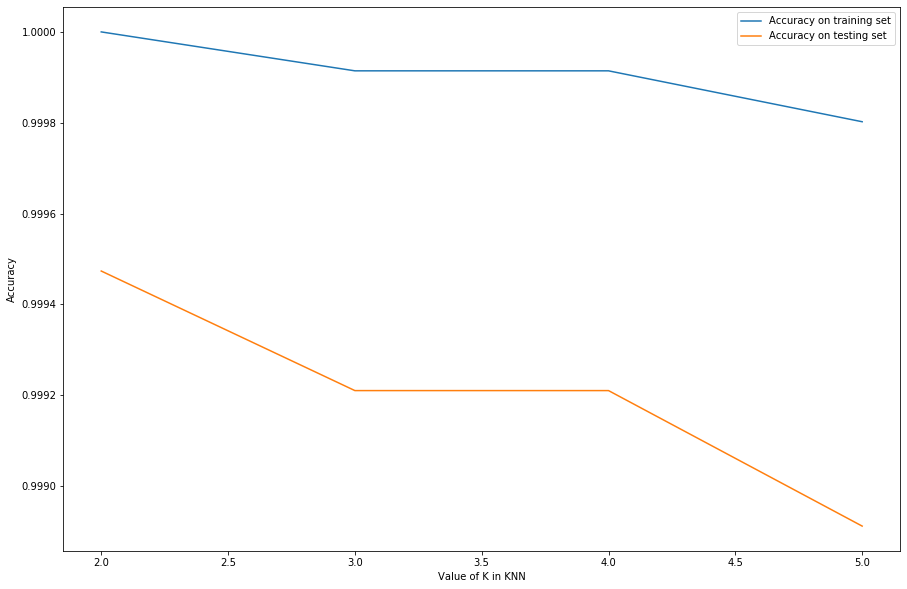

In [156]:
# Choosing optimal value of K
k_range = range(2, 6)
train_score=[]
test_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_rand,y_train_rand)
    train_score.append(knn.score(X_train_rand,y_train_rand))
    test_score.append(knn.score(X_test,y_test))
    
plt.plot(k_range,train_score,label= 'Accuracy on training set')
plt.plot(k_range,test_score,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [157]:
print("Train Accuracy Value for all the K values is : \n", train_score)
print("Test Accuracy Value for all the K values is : \n", test_score)

Train Accuracy Value for all the K values is : 
 [1.0, 0.9999142672487701, 0.9999142672487701, 0.9998021551894694]
Test Accuracy Value for all the K values is : 
 [0.9994733330992591, 0.9992099996488887, 0.9992099996488887, 0.9989115550718023]


In [181]:
# 2 seems to be good number for selecting k, So builiding model with k=2
knn_rand_2 = KNeighborsClassifier(n_neighbors=2)
knn_rand_2.fit(X_train_rand,y_train_rand)
print('Accuracy of KNN model where k=3 on the testing dataset is : ', knn_rand_2.score(X_test,y_test))

Accuracy of KNN model where k=3 on the testing dataset is :  0.9994733330992591


In [182]:
y_pred_rand_knn = knn_rand_2.predict(X_test)

In [183]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_rand_knn)
print("Confusion Metrix for KNN Model is : \n", cm)

Confusion Metrix for KNN Model is : 
 [[56848    16]
 [   14    84]]


In [184]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_rand_knn, average='binary')
print("Sensitivit|y: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivit|y: 	0.86
Specificity: 	1.0


In [185]:
print('Precision score for the KNN model is : ', precision_score(y_test, y_pred_rand_knn, average='binary'))
print('Recall score for the KNN model is : ', recall_score(y_test, y_pred_rand_knn, average='binary'))
print('F-1 score for the KNN model is : ', f1_score(y_test, y_pred_rand_knn, average='binary'))

Precision score for the KNN model is :  0.84
Recall score for the KNN model is :  0.8571428571428571
F-1 score for the KNN model is :  0.8484848484848485


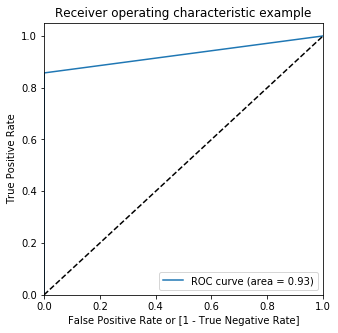

In [186]:
draw_roc(y_test, y_pred_rand_knn)

### Random Forest -

In [158]:
# Buliding a model with random forest classifier
randomForest = RandomForestClassifier()
# hyperparameter space
n_estimators = [100, 200, 300, 400, 500]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 20, 30, 40, 50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,'bootstrap': bootstrap}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
# Tuning the model using RandomizedSearchCV
random_forest_rand = RandomizedSearchCV(estimator = randomForest, param_distributions = random_grid, n_iter = 2, cv = folds, verbose=0, random_state=100 , n_jobs = -1)

In [159]:
# Fitting the model
random_forest_rand.fit(X_train_rand, y_train_rand)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=...
                     

In [160]:
print("Best AUC for random forest model : \n", random_forest_rand.best_score_)
print("Best Params for random forest model :\n ", random_forest_rand.best_params_)
print("Best Estimator for random forest model :\n ",random_forest_rand.best_estimator_)

Best AUC for random forest model : 
 0.9999604310572223
Best Params for random forest model :
  {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Estimator for random forest model :
  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [187]:
# Building the random forest model with best parameter
# Building the model with the best parameter got from the randomised search
rf_model_rand_3 = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf_model_rand_3.fit(X_train_rand,y_train_rand)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [188]:
y_pred_rand_rf = rf_model_rand_3.predict(X_test)

In [189]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_rand_rf)
print("Confusion Metrix for Random Forest Model is : \n", cm)

Confusion Metrix for Random Forest Model is : 
 [[56855     9]
 [   15    83]]


In [190]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_rand_rf, average='binary')
print("Sensitivit|y: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivit|y: 	0.85
Specificity: 	1.0


In [191]:
print('Precision score for the Random Forest model is : ', precision_score(y_test, y_pred_rand_rf, average='binary'))
print('Recall score for the Random Forest model is : ', recall_score(y_test, y_pred_rand_rf, average='binary'))
print('F-1 score for the Random Forest model is : ', f1_score(y_test, y_pred_rand_rf, average='binary'))

Precision score for the Random Forest model is :  0.9021739130434783
Recall score for the Random Forest model is :  0.8469387755102041
F-1 score for the Random Forest model is :  0.8736842105263158


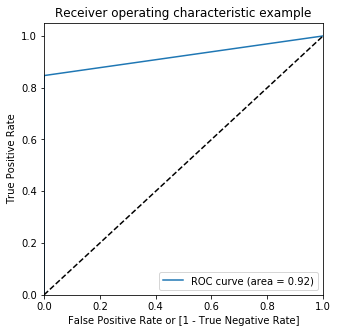

In [192]:
draw_roc(y_test, y_pred_rand_rf)

Top variable = 14
2nd Top variable = 4
3rd Top variable = 10


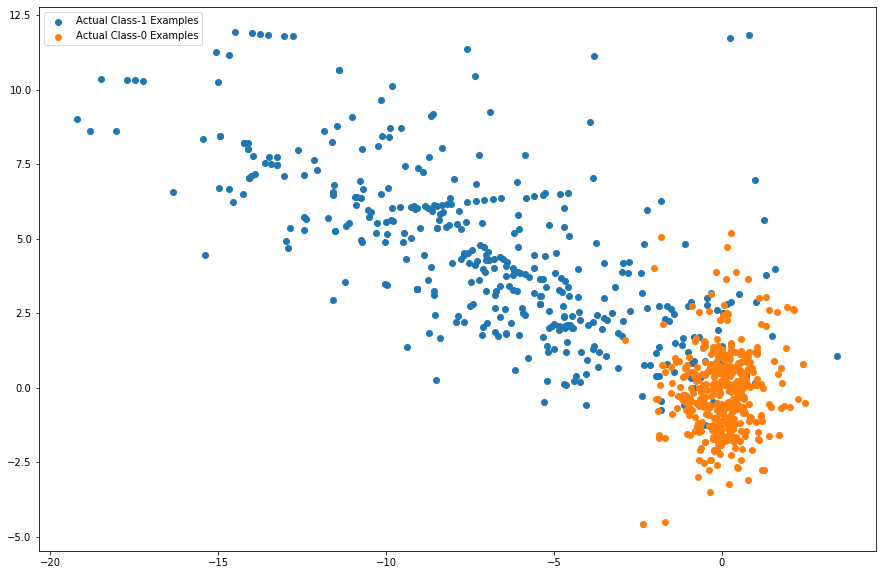

In [211]:
imp_feature(rf_model_rand_3)

### XG Boost

In [161]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)
xg_boost_rand = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=4, cv=skf, verbose=3, random_state=1001)


In [162]:
xg_boost_rand.fit(X_train_rand, y_train_rand)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 166.7min finished


[13:11:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1001, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='deprecated', n_ite

In [163]:
print("Best AUC for XGB model : \n", xg_boost_rand.best_score_)
print("Best Params for XGB model :\n ", xg_boost_rand.best_params_)
print("Best Estimator for XGB model :\n ",xg_boost_rand.best_estimator_)

Best AUC for XGB model : 
 0.9999697794059254
Best Params for XGB model :
  {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8}
Best Estimator for XGB model :
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [212]:
xgb_model_rand_4 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_model_rand_4.fit(X_train_rand, y_train_rand)

[15:00:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [213]:
y_pred_rand_xgb = xgb_model_rand_4.predict(X_test.values)

In [214]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_rand_xgb)
print("Confusion Metrix for XG Boost Model is : \n", cm)

Confusion Metrix for XG Boost Model is : 
 [[56812    52]
 [    9    89]]


In [215]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_rand_xgb, average='binary')
print("Sensitivit|y: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivit|y: 	0.91
Specificity: 	1.0


In [216]:
print('Precision score for the XG Boost model is : ', precision_score(y_test, y_pred_rand_xgb, average='binary'))
print('Recall score for the XG Boost model is : ', recall_score(y_test, y_pred_rand_xgb, average='binary'))
print('F-1 score for the XG Boost model is : ', f1_score(y_test, y_pred_rand_xgb, average='binary'))

Precision score for the XG Boost model is :  0.6312056737588653
Recall score for the XG Boost model is :  0.9081632653061225
F-1 score for the XG Boost model is :  0.7447698744769875


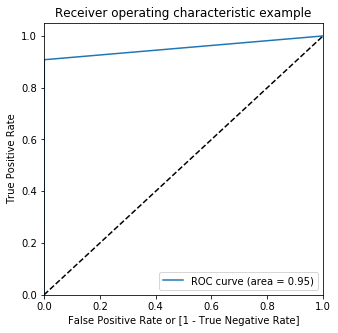

In [217]:
draw_roc(y_test, y_pred_rand_xgb)

Top variable = 14
2nd Top variable = 10
3rd Top variable = 4


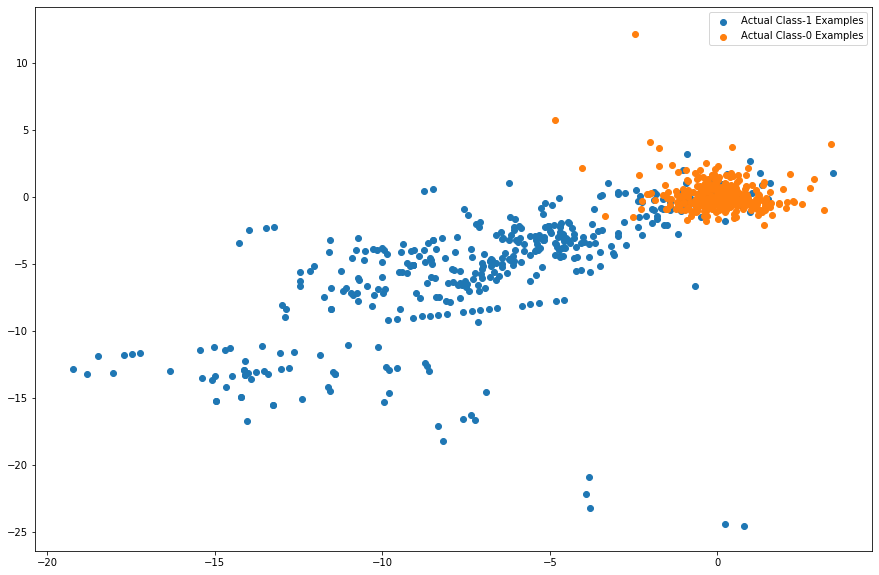

In [218]:
imp_feature(xgb_model_rand_4)

## Getting the Matrix for all the created model -

In [243]:
print("Evaluation Matrix for LR model with Imbalace Data : \n\n",classification_report(y_test, y_pred_lr))
print("Evaluation Matrix for KNN model with Imbalace Data : \n\n",classification_report(y_test, y_pred_knn))
print("Evaluation Matrix for RF model with Imbalace Data : \n\n",classification_report(y_test, y_pred_rf))
print("Evaluation Matrix for XGB model with Imbalace Data : \n\n",classification_report(y_test, y_pred_xgb))    

Evaluation Matrix for LR model with Imbalace Data : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.58      0.71        98

    accuracy                           1.00     56962
   macro avg       0.95      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Evaluation Matrix for KNN model with Imbalace Data : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.83      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Evaluation Matrix for RF model with Imbalace Data : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.86      0.89        98

    accuracy    

In [244]:
print("Evaluation Matrix for LR model with random over samplling : \n\n",classification_report(y_test, y_pred_rand_lr))
print("Evaluation Matrix for KNN model with random over samplling : \n\n",classification_report(y_test, y_pred_rand_knn))
print("Evaluation Matrix for RF model with random over samplling : \n\n",classification_report(y_test, y_pred_rand_rf))
print("Evaluation Matrix for XGB model with random over samplling : \n\n",classification_report(y_test, y_pred_rand_xgb))   

Evaluation Matrix for LR model with random over samplling : 

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Evaluation Matrix for KNN model with random over samplling : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.86      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Evaluation Matrix for RF model with random over samplling : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.85      0.87    

In [245]:
print("Evaluation Matrix for LR model with SMOTE over samplling : \n\n",classification_report(y_test, y_pred_smote_lr))
print("Evaluation Matrix for KNN model with SMOTE over samplling : \n\n",classification_report(y_test, y_pred_smote_knn))
print("Evaluation Matrix for RF model with SMOTE over samplling : \n\n",classification_report(y_test, y_pred_smote_rf))
print("Evaluation Matrix for XGB model with SMOTE over samplling : \n\n",classification_report(y_test, y_pred_smote_xgb))   

Evaluation Matrix for LR model with SMOTE over samplling : 

               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Evaluation Matrix for KNN model with SMOTE over samplling : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.86      0.77        98

    accuracy                           1.00     56962
   macro avg       0.85      0.93      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Evaluation Matrix for RF model with SMOTE over samplling : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.88      0.80       

In [246]:
print("Evaluation Matrix for LR model with ADASYN over samplling : \n\n",classification_report(y_test, y_pred_ada_lr))
print("Evaluation Matrix for KNN model with ADASYN over samplling : \n\n",classification_report(y_test, y_pred_ada_knn))
print("Evaluation Matrix for RF model with ADASYN over samplling : \n\n",classification_report(y_test, y_pred_ada_rf))
print("Evaluation Matrix for XGB model with ADASYN over samplling : \n\n",classification_report(y_test, y_pred_ada_xgb))   

Evaluation Matrix for LR model with ADASYN over samplling : 

               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.96      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962

Evaluation Matrix for KNN model with ADASYN over samplling : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.55      0.87      0.67        98

    accuracy                           1.00     56962
   macro avg       0.77      0.93      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Evaluation Matrix for RF model with ADASYN over samplling : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.52      0.90      0.66    

### For our project we need to predict fraud transaction more accuratly, Hence our focus is getting greater value of Recall, So build model can predict more fraud transaction correctly. So here we will gonna choose model with highest value of recall with optimal value of precision.



### From above analysis we can see that Below XG Boost and Logistic Regression with ADASYN oversampling are the best model for our analysis.
#### Logistic Regression with ADASYN
    ---- Recall    -> 96%
    ---- ROC-AUC   -> 93%
#### XG Boost with ADASYN
    ---- Recall    -> 93%
    ---- ROC-AUC   -> 96%    
 